# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [230]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [232]:
# Carregar X_train, Y_train, X_test, Y_test
X_train = pd.read_csv(r'C:\Users\vinic\Exercicios\M17\UCI HAR Dataset\train\x_train_selected.csv', index_col=0)  # Certifique-se de ajustar o caminho do arquivo
Y_train = pd.read_csv(r'C:\Users\vinic\Exercicios\M17\UCI HAR Dataset\train\y_train.txt', index_col=0)
X_test = pd.read_csv(r'C:\Users\vinic\Exercicios\M17\UCI HAR Dataset\test\x_test_selected.csv', index_col=0)
Y_test = pd.read_csv(r'C:\Users\vinic\Exercicios\M17\UCI HAR Dataset\test\y_test.txt', index_col=0)

# Verificar as primeiras linhas para garantir que as bases foram carregadas corretamente
print(X_train.head())
print(Y_train.head())
print(X_test.head())
print(Y_test.head())

       subject  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
order                                                                  
0            1           0.288585          -0.020294          -0.132905
1            1           0.278419          -0.016411          -0.123520
2            1           0.279653          -0.019467          -0.113462
3            1           0.279174          -0.026201          -0.123283
4            1           0.276629          -0.016570          -0.115362
Empty DataFrame
Columns: []
Index: [5, 5, 5, 5, 5]
       subject  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
order                                                                  
0            1           0.288585          -0.020294          -0.132905
1            1           0.278419          -0.016411          -0.123520
2            1           0.279653          -0.019467          -0.113462
3            1           0.279174          -0.026201          -0.123283
4            

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [235]:
X_train = X_train.iloc[:7351, :]

In [237]:
# Separar 25% da base de treino para validação
X_train_final, X_val, Y_train_final, Y_val = train_test_split(
    X_train, Y_train, test_size=0.25, random_state=42
)

# Exibir os tamanhos das novas bases para conferência
print(f"Tamanho do X_train_final: {X_train_final.shape}")
print(f"Tamanho do X_val: {X_val.shape}")
print(f"Tamanho do Y_train_final: {Y_train_final.shape}")
print(f"Tamanho do Y_val: {Y_val.shape}")

Tamanho do X_train_final: (5513, 4)
Tamanho do X_val: (1838, 4)
Tamanho do Y_train_final: (5513, 0)
Tamanho do Y_val: (1838, 0)


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [239]:
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)

In [241]:
Y_train.shape

(7351, 0)

In [212]:
# Agora tenta rodar novamente
caminho = DecisionTreeClassifier(random_state=2360873).cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities


ValueError: at least one array or dtype is required

In [17]:
ccp_alphas

array([0.        , 0.00012093, 0.00012093, ..., 0.00675205, 0.00793145,
       0.03221499])

In [19]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train,y_train)
    clfs.append(clf)

In [21]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_val, y_val) for clf in clfs]

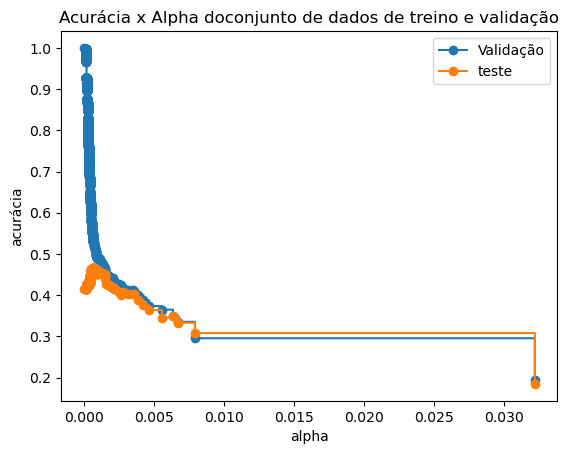

In [23]:
fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("acurácia")
ax.set_title("Acurácia x Alpha doconjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker="o", label="Validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker="o", label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [25]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores))-1
melhor_arvore = clfs[ind_melhor_arvore]

print(f"Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:2f}")

melhor_arvore

Acurácia da melhor árvore na base de validação: 46.626768


DecisionTreeClassifier(ccp_alpha=0.0006965107772382781, random_state=2360873)

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [27]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores))-1
melhor_arvore = clfs[ind_melhor_arvore]

print(f"Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:2f}")

melhor_arvore

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [65]:
print(y_test.columns)  # Mostra todas as colunas de X_test

Index(['Unnamed: 0', '0'], dtype='object')


In [55]:
acuracia_teste = melhor_arvore.score(X_test, y_train)

print(f"acurácia: {acuracia_teste*100:.2f}")
plot_confusion_matrix(melhor_arvore, X_test, y_train);

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- subject
